In [ ]:
# for first run, un-comment file generation
# for re-vizualiztion and checking, comment out to prevent reproduction of files

Notes on Initial Data Aquisition

Paper (https://ui.adsabs.harvard.edu/abs/2020AJ....159....8V/abstract)

FTP site (https://cdsarc.cds.unistra.fr/ftp/J/AJ/159/8/)

table2.dat
table3.dat

CDS X-match (http://cdsxmatch.u-strasbg.fr/)

Table 1: J/AJ/159/8/table2 
Table 2: USNO-B1.0
Cross-match criteria: By position (Radius: 5 arcsec, but this is arbitrary)
Cross-match area: All sky

CDSX-Match.csv

In [30]:
import numpy as np
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt

plt.style.use('dark_background')

plt.rcParams.update({'axes.linewidth' : 1,
                     'ytick.major.width' : 1,
                     'ytick.minor.width' : 1,
                     'xtick.major.width' : 1,
                     'xtick.minor.width' : 1,
                     'xtick.labelsize': 10, 
                     'ytick.labelsize': 10,
                     'axes.labelsize': 12,
                     'font.family': 'Monospace',
                     'figure.figsize': (10, 6)
                    })

In [ ]:
#files to log progress (and plot later)

#file 1 headers: RA_table | DEC_table | r(mag)_table | ID_USNO | RA_USNO | DEC_USNO | r(mag)_USNO | dd | dr | USNOmatch? | pm? | pm_RA | pm_DEC | e_pm_RA | e_pm_DEC | new_RA | new_DEC | e_new_RA | e_new_DEC

In [2]:
#cleanup data and verify that we correctly mapped the candidate list to the original USNO B1.0 catalog

filename = "CDSX-Match.csv"
ds0 = pd.read_csv(filename)
ds = ds0.drop_duplicates(subset=['_RAJ2000'],keep='first').reset_index()  
ra_table = ds['_RAJ2000']
dec_table = ds['_DEJ2000']
rmag_table = ds['rmag']
id_USNO = ds['USNO-B1.0']
ra_USNO = ds['RAJ2000.1']
dec_USNO = ds['DEJ2000.1']
rmag_USNO = ds['Rmag1']
dd = ds['angDist']
pm_RA = ds['pmRA']
pm_DEC = ds['pmDE']
e_pm_RA = ds['e_pmRA']
e_pm_DEC = ds['e_pmDE']
new_RA = ra_USNO + pm_RA*70/1000
new_DEC = dec_USNO + pm_DEC*70/1000
e_new_RA = e_pm_RA*70/1000
e_new_DEC = e_pm_DEC*70/1000

#dd = pd.Series()
dr = pd.Series()
USNOmatchq = pd.Series()
pmq = pd.Series()

for i in range(len(ds)):
    #dd[i] = ((ra_table[i]-ra_USNO[i])**2+(dec_table[i]-dec_USNO[i])**2)**0.5
    dr[i] = np.abs(rmag_table[i]-rmag_USNO[i])
    if dd[i] < 0.5:
        USNOmatchq[i] = 'yes'
    else:    
        USNOmatchq[i] = 'no'
    if np.abs(pm_RA[i]) > 0:  
        pmq[i] = 1
    else:
        pmq[i] = 0          


data0 = {'RA_table': ra_table,
        'DEC_table': dec_table,
        'r(mag)_table': rmag_table,
        'ID_USNO': id_USNO,
        'RA_USNO': ra_USNO,
        'DEC_USNO': dec_USNO,
        'r(mag)_USNO': rmag_USNO,
        'dd': dd,
        'dr': dr,
        'USNOmatch?': USNOmatchq,
        'pm?': pmq,
        'pm_RA': pm_RA,
        'pm_DEC': pm_DEC,
        'e_pm_RA': e_pm_RA,
        'e_pm_DEC': e_pm_DEC,
        'new_RA': new_RA,
        'new_DEC': new_DEC,
        'e_new_RA': e_new_RA,
        'e_new_DEC': e_new_DEC}
d0 = pd.DataFrame(data0)

out_name= 'file1.csv'
#d0.to_csv(out_name)

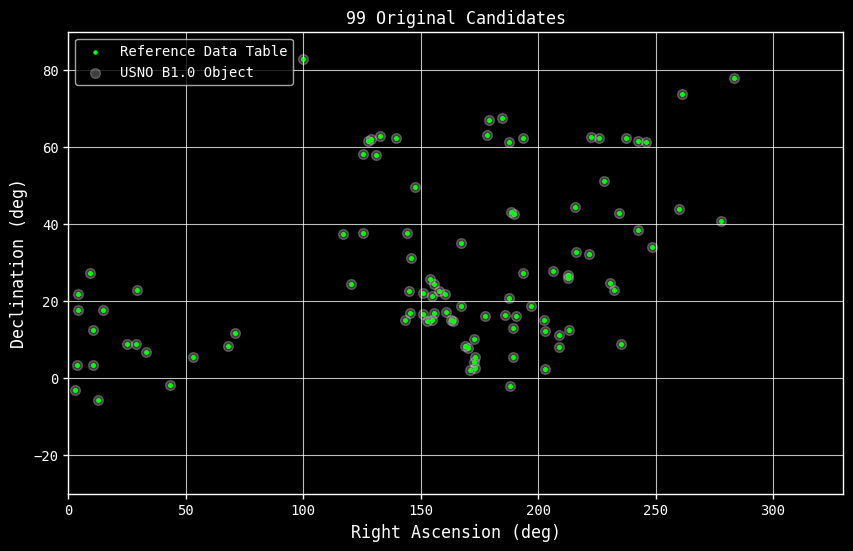

In [161]:
#original list and USNO matches


plt.figure(figsize=(10, 6))
plt.scatter(ra_table, dec_table, s=5,c='lime', label="Reference Data Table")
plt.scatter(ra_USNO, dec_USNO, s=50,c='white',alpha=0.25, label="USNO B1.0 Object")
plt.scatter(ra_table, dec_table, s=5,c='lime')


plt.title(str(len(id_USNO))+" Original Candidates")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.xlim(0,330)
plt.ylim(-30,90)
plt.grid(alpha=0.75)
plt.legend()

plt.savefig('og99.png')

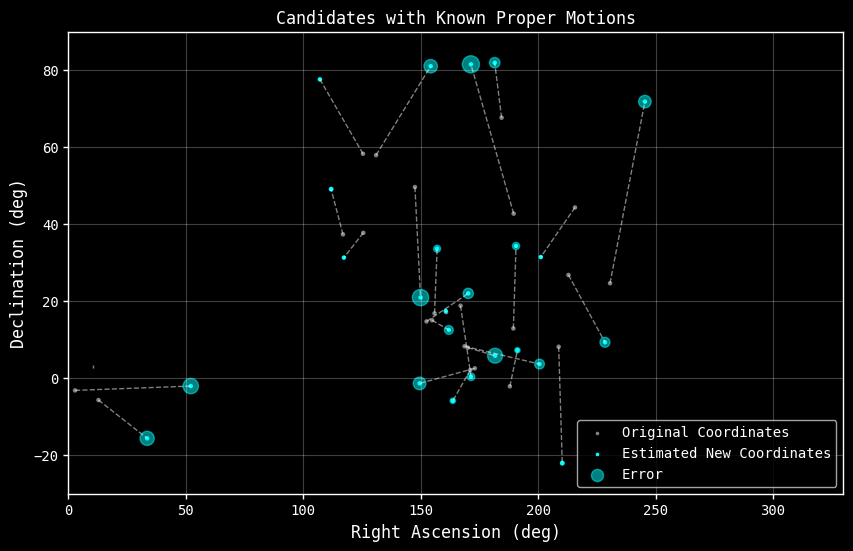

In [162]:
plt.figure(figsize=(10, 6))
plt.scatter(ra_USNO, dec_USNO, s=pmq*5,c='gray', label="Original Coordinates")
plt.scatter(new_RA, new_DEC, s=pmq*5,c='cyan', label="Estimated New Coordinates")
plt.scatter(new_RA, new_DEC, s=(e_new_RA**2+e_new_DEC**2),c='cyan',alpha=0.5, label="Error")

for i in range(len(pmq)):
    plt.plot([ra_USNO[i], new_RA[i]], [dec_USNO[i], new_DEC[i]], color='white', alpha=0.5, linestyle='--', linewidth=1)

plt.title("Candidates with Known Proper Motions")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.xlim(0,330)
plt.ylim(-30,90)
plt.grid(alpha=0.25)
plt.legend()

plt.savefig('PMonly.png')

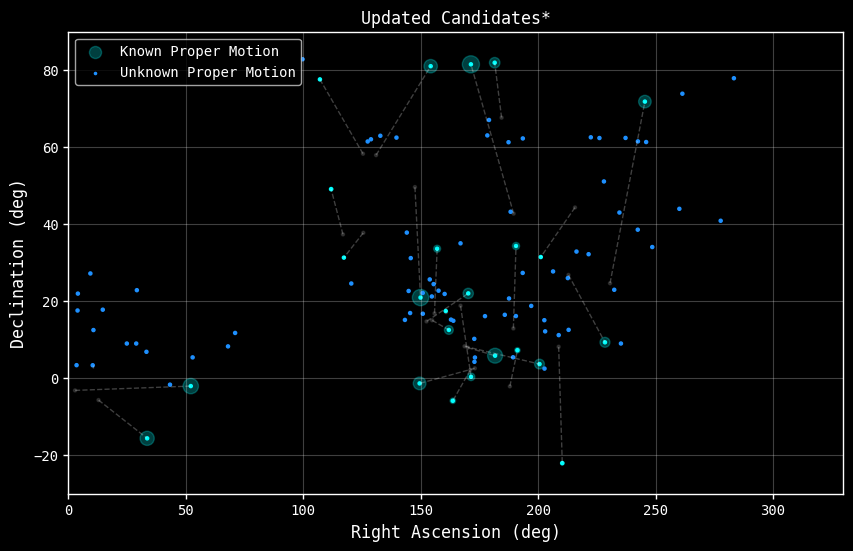

In [163]:
plt.figure(figsize=(10, 6))
plt.scatter(ra_USNO, dec_USNO, s=pmq*5,c='gray',alpha=0.25)
plt.scatter(new_RA, new_DEC, s=pmq*5,c='cyan')
plt.scatter(new_RA, new_DEC, s=e_new_RA**2+e_new_DEC**2,c='cyan',alpha=0.25,label="Known Proper Motion")
for i in range(len(pmq)):
    plt.plot([ra_USNO[i], new_RA[i]], [dec_USNO[i], new_DEC[i]], color='white', alpha=0.25, linestyle='--', linewidth=1)

plt.scatter(ra_USNO, dec_USNO, s=(1-pmq)*5,c='dodgerblue', label="Unknown Proper Motion")


plt.title("Updated Candidates*")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.xlim(0,330)
plt.ylim(-30,90)
plt.grid(alpha=0.25)
plt.legend()

plt.savefig('PM99.png')

In [6]:
#format .csv for pan-starrs match

data01 = {'ra': new_RA,
        'dec': new_DEC}
d01 = pd.DataFrame(data01)

out_name= 'candidates.csv'
#d01.to_csv(out_name)


Pan-STARRS Catalog Site (https://catalogs.mast.stsci.edu/panstarrs/)
Release: PS1 DR2
Catalog: ?
"Crossmatch a List of Targets"
Crossmatch Search Radius: 3 Arcseconds

input: candidates.csv
ouput: US-P.csv (need to manually set name and type)

In [7]:
#format .tbl for gaia match 

out_name= 'candidates.tbl'
out = Table.from_pandas(d01)
#out.write(out_name, format='ipac')

IRSA Catalog Query Engine (https://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?mission=irsa&submit=Select&projshort=Gaia)
Database: DR3
"Multi-Object Search"
"One to One Match"
Cone Search Radius: 10 arcsec

input: candidates.csv
ouput: US-G.csv (need to manually set name and type)

In [8]:
#read outputs

filename = "US-P.csv"
dp0 = pd.read_csv(filename)
dp = dp0.drop_duplicates(subset=['_searchID_'],keep='first').sort_values(by='_searchID_').reset_index()                      
pra = dp["MatchRA"]
pdec = dp["MatchDEC"]
pid = dp["objName"]
dup = dp["dstArcSec"]
pindex = dp["_searchID_"]

filename = "US-G.csv"
dg = pd.read_csv(filename).dropna(subset=['dist_x']).reset_index()
gra = dg["ra"]
gdec = dg["dec"]
gid = dg["designation"]
dug = dg["dist_x"]
gindex = dg["cntr_01"]-1

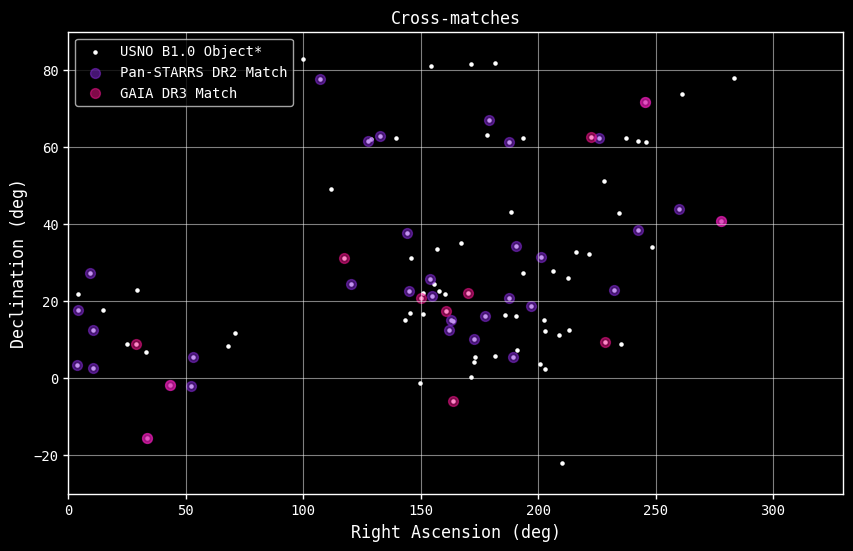

In [164]:
#plot matches

plt.figure(figsize=(10, 6))

plt.scatter(new_RA, new_DEC, s=5,c='white', label="USNO B1.0 Object*")
#plt.scatter(new_RA, new_DEC, s=(e_new_RA**2+e_new_DEC**2),c='white',alpha=0.25)
plt.scatter(pra, pdec, s=50,c='blueviolet', alpha=0.5, label="Pan-STARRS DR2 Match")
plt.scatter(gra, gdec, s=50,c='deeppink', alpha=0.5, label="GAIA DR3 Match")

plt.title("Cross-matches")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.xlim(0,330)
plt.ylim(-30,90)
plt.grid(alpha=0.5)
plt.legend()

plt.savefig('cm1.png')

In [10]:
#format .tbls for reverse match

data1 = {'ra': pra,
        'dec': pdec}
d1 = pd.DataFrame(data1)

data2 = {'ra': gra,
        'dec': gdec}
d2 = pd.DataFrame(data2)

out_name1= 'US-P.tbl'
out1 = Table.from_pandas(d1)
#out1.write(out_name1, format='ipac')

out_name2= 'US-G.tbl'
out2 = Table.from_pandas(d2)
#out2.write(out_name2, format='ipac')

IRSA Catalog Query Engine (https://irsa.ipac.caltech.edu/cgi-bin/Gator/nph-scan?mission=irsa&submit=Select&projshort=USNO)
Database: USNO-B1
"Multi-Object Search"
"One to One Match"
Cone Search Radius: 10 arcsec

input: US-P.tbl
ouput: P-US.csv (need to manually set name and type)

input: US-G.tbl
ouput: G-US.csv (need to manually set name and type)

In [11]:
#read outputs

filename = "P-US.csv"
dp = pd.read_csv(filename)
upra = dp["ra"]
updec = dp["dec"]
upid = dp["usno_b1"]
dpu = dp["dist_x"]

filename = "G-US.csv"
dg = pd.read_csv(filename)
ugra = dg["ra"]
ugdec = dg["dec"]
ugid = dg["usno_b1"]
dgu = dg["dist_x"]

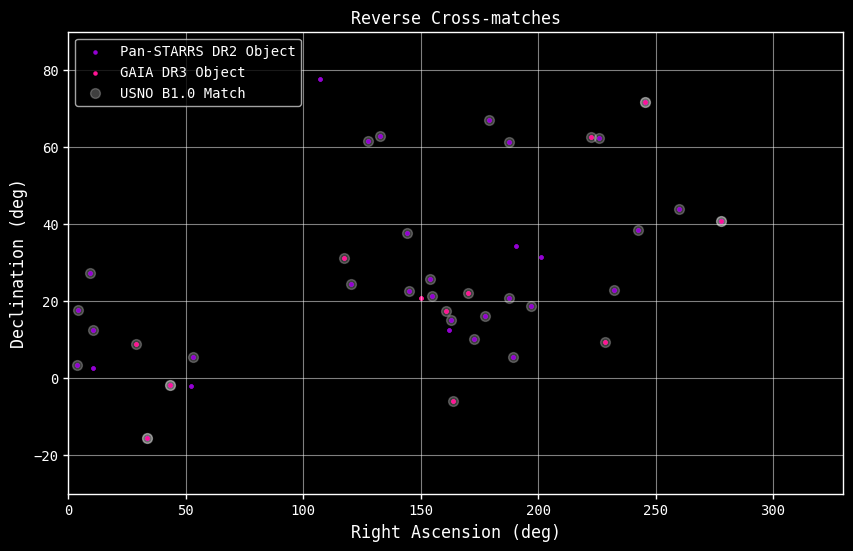

In [165]:
#plot matches

plt.figure(figsize=(10, 6))

#plt.scatter(new_RA, new_DEC, s=5,c='gray', label="USNO")
#plt.scatter(new_RA, new_DEC, s=(e_new_RA**2+e_new_DEC**2),c='gray',alpha=0.25)
plt.scatter(pra, pdec, s=5,c='darkviolet', alpha=1, label="Pan-STARRS DR2 Object")
plt.scatter(gra, gdec, s=5,c='deeppink', alpha=1, label="GAIA DR3 Object")
plt.scatter(upra, updec, s=50,c='white', alpha=0.25, label="USNO B1.0 Match")
plt.scatter(ugra, ugdec, s=50,c='white', alpha=0.25)
plt.scatter(pra, pdec, s=5,c='darkviolet', alpha=1)
plt.scatter(gra, gdec, s=5,c='deeppink', alpha=1)

plt.title("Reverse Cross-matches")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.xlim(0,330)
plt.ylim(-30,90)
plt.grid(alpha=0.5)
plt.legend()

plt.savefig('rcm.png')

In [ ]:
#more files

# U-PS refers to cross-matching the USNO coordinates with the Pan-STARRs catalog, giving the closest PS object
# PS-U refers to re-cross-matching, looking for the closest U object to those PS

#file 1.1 headers: ID_USNO | RA_USNO | DEC_USNO | ID_U-PS | RA_U-PS | DEC_U-PS | d_U-PS | ID_PS-U | RA_PS-U | DEC_PS-U | d_PS_U | PSmatch? 

#file 1.2 headers: ID_USNO | RA_USNO | DEC_USNO | ID_U-G | RA_U-G | DEC_U-G | d_U-G | ID_G-U | RA_G-U | DEC_G-U | d_G-U | GAIAmatch? 

In [13]:
#reindex data for matching compatibility

id_USNOp = pd.Series()
new_RAp = pd.Series()
new_DECp = pd.Series()
pmqp = pd.Series()
j = 0 
for i in pindex:
    id_USNOp[j] = id_USNO[i]
    new_RAp[j] = new_RA[i]
    new_DECp[j] = new_DEC[i]
    pmqp[j] = pmq[i]
    j = j+1

id_USNOg = pd.Series()
new_RAg = pd.Series()
new_DECg = pd.Series()
pmqg = pd.Series()
j = 0 
for i in gindex:
    id_USNOg[j] = id_USNO[i]
    new_RAg[j] = new_RA[i]
    new_DECg[j] = new_DEC[i]
    pmqg[j] = pmq[i]
    j = j+1

In [14]:
#classify matches

#criteria:
#reverse match returns original usno object -> 1-1 match
#reverse match is null -> default match
#reverse match returns different object but dup < dpu (old one is closer) -> closest match

onep = pd.Series()
defp = pd.Series()
closep = pd.Series()
pmatch = pd.Series()

for i in range(len(pindex)):
    if upid[i] == id_USNOp[i]:
        onep[i] = 1
        defp[i] = 0
        closep[i] = 0
    else: 
        onep[i] = 0
        if dpu.isna()[i] == True: 
            defp[i] = 1
            closep[i] = 0
        else: 
            defp[i] = 0
            if dup[i] < dpu[i]:
                closep[i] = 1
            else: 
                closep[i] = 0
    pmatch[i] = int(onep[i]) + int(defp[i]) + int(closep[i])
    
oneg = pd.Series()
defg = pd.Series()
closeg = pd.Series()
gmatch = pd.Series()

for i in range(len(gindex)):
    if ugid[i] == id_USNOg[i]:
        oneg[i] = 1
        defg[i] = 0
        closeg[i] = 0
    else: 
        oneg[i] = 0
        if dgu.isna()[i] == True: 
            defg[i] = 1
            closeg[i] = 0
        else: 
            defg[i] = 0
            if dug[i] < dgu[i]:
                closeg[i] = 1
            else: 
                closeg[i] = 0
    gmatch[i] = int(oneg[i]) + int(defg[i]) + int(closeg[i])

In [15]:
data11 = {'ID_USNO': id_USNOp,
        'RA_USNO': new_RAp,
        'DEC_USNO': new_DECp,
        'PM?': pmqp,
        'ID_U-PS': pid,
        'RA_U-PS': pra,
        'DEC_U-PS': pdec,
        'd_U-PS': dup,
        'ID_PS-U': upid,
        'RA_PS-U': upra,
        'DEC_PS-U': updec,
        'd_PS-U': dpu,
        '1-1_Match': onep,
        'Default_Match': defp,
        'Closest Match': closep,
        'PS_Match?':pmatch}
d11 = pd.DataFrame(data11)

data12 = {'ID_USNO': id_USNOg,
        'RA_USNO': new_RAg,
        'DEC_USNO': new_DECg,
        'PM?': pmqg,
        'ID_U-G': gid,
        'RA_U-G': gra,
        'DEC_U-G': gdec,
        'd_U-G': dug,
        'ID_G-U': ugid,
        'RA_G-U': ugra,
        'DEC_G-U': ugdec,
        'd_G-U': dgu,
        '1-1_Match': oneg,
        'Default_Match': defg,
        'Closest Match': closeg,
        'GAIA_Match?':gmatch}
d12 = pd.DataFrame(data12)

In [140]:
out_name11= 'file11.csv'
d11.to_csv(out_name11)
out_name12= 'file12.csv'
d12.to_csv(out_name12)

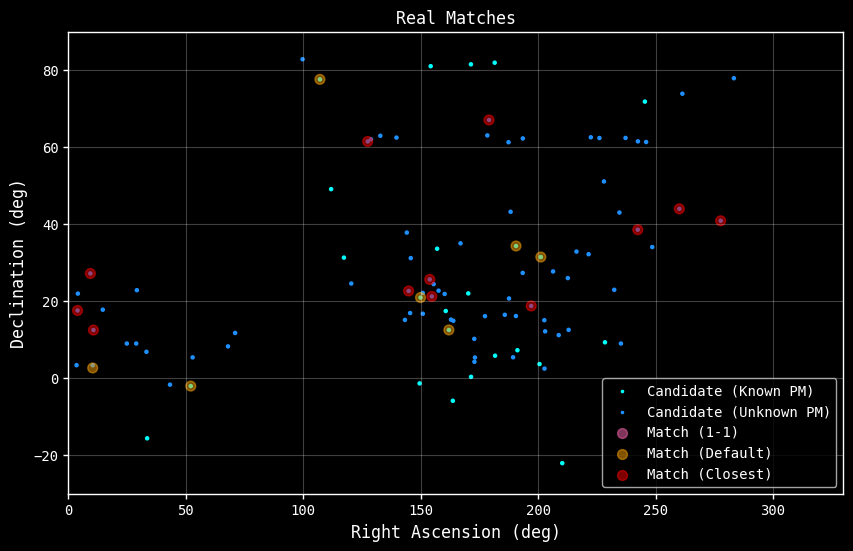

In [166]:
#plot match results 

plt.figure(figsize=(10, 6))

plt.scatter(new_RA, new_DEC, s=pmq*5,c='cyan',label="Candidate (Known PM)")
#plt.scatter(new_RA, new_DEC, s=e_new_RA**2+e_new_DEC**2,c='cyan',alpha=0.15,label="Candidate (Known PM)")
plt.scatter(ra_USNO, dec_USNO, s=(1-pmq)*5,c='dodgerblue', label="Candidate (Unknown PM)")

plt.scatter(pra*-10, pdec*0, s=50,c='hotpink', alpha=0.5, label="Match (1-1)")
plt.scatter(pra*-10, pdec*0, s=50,c='orange', alpha=0.5, label="Match (Default)")
plt.scatter(pra*-10, pdec*0, s=50,c='red', alpha=0.5, label="Match (Closest)")
plt.scatter(pra, pdec, s=onep*50,c='hotpink', alpha=0.25)
plt.scatter(pra, pdec, s=defp*50,c='orange', alpha=0.5)
plt.scatter(pra, pdec, s=closep*50,c='red', alpha=0.5)
plt.scatter(gra, gdec, s=oneg*50,c='hotpink', alpha=0.25)
plt.scatter(gra, gdec, s=defg*50,c='orange', alpha=0.5)
plt.scatter(gra, gdec, s=closeg*50,c='red', alpha=0.5)

plt.title("Real Matches")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.xlim(0,330)
plt.ylim(-30,90)
plt.grid(alpha=0.25)
plt.legend()

plt.savefig('rmatch.png')

In [ ]:
#combined clean summary file for complete candidate list

#file 2 headers:  USNO Object (ID) | RA (deg) | DEC (deg) | PM (arcs/yr) | Closest Pan-STARRS Object (ID) | PS Match? | Closest GAIA Object (ID) | GAIA Match? 

In [17]:
#reindex and match files of different lengths

pcid = pd.Series()
pma = pd.Series()
gcid = pd.Series()
gma = pd.Series()

for i in range(len(id_USNO)):
    for j in range(len(id_USNOp)):
        if id_USNOp[j] == id_USNO[i]:
            pcid[i] = pid[j]
            pma[i] = pmatch[j]
    for k in range(len(id_USNOg)):
        if id_USNOg[k] == id_USNO[i]:
            gcid[i] = gid[k]
            gma[i] = gmatch[k]

full_index = range(len(id_USNO))
pcid = pcid.reindex(full_index, fill_value=0)
pma  = pma.reindex(full_index, fill_value=0)
gcid = gcid.reindex(full_index, fill_value=0)
gma  = gma.reindex(full_index, fill_value=0)

tma = pma + gma

In [18]:
#file 2 headers:  USNO Object (ID) | RA (deg) | DEC (deg) | PM (arcs/yr) | Closest Pan-STARRS Object (ID) | PS Match? | Closest GAIA Object (ID) | GAIA Match? 

data02 = {'USNO Object (ID)': id_USNO,
        'RA (deg)': new_RA,
        'DEC (deg)': new_DEC,
        'r (mag)': rmag_USNO,
        'PM?': pmq,
        'PM_RA (mas/yr)': pm_RA,
        'DEC_RA (mas/yr)': pm_DEC,
        'Closest Pan-STARRS Object (ID)': pcid,
        'PS Match?': pma,
        'Closest GAIA Object (ID)': gcid,
        'G Match?': gma,
        'Candidate?': 1-tma}
d02 = pd.DataFrame(data02)

out_name02= 'file2.csv'
#d02.to_csv(out_name02)

In [19]:
print("Pan-STARRS Matches:", pma.sum())
print("Pan-STARRS Matches:", gma.sum())
print("Total Matches:", tma.sum())
print("Remaining Number of Candidates:",len(id_USNO)-tma.sum())

Pan-STARRS Matches: 18
Pan-STARRS Matches: 1
Total Matches: 19
Remaining Number of Candidates: 80


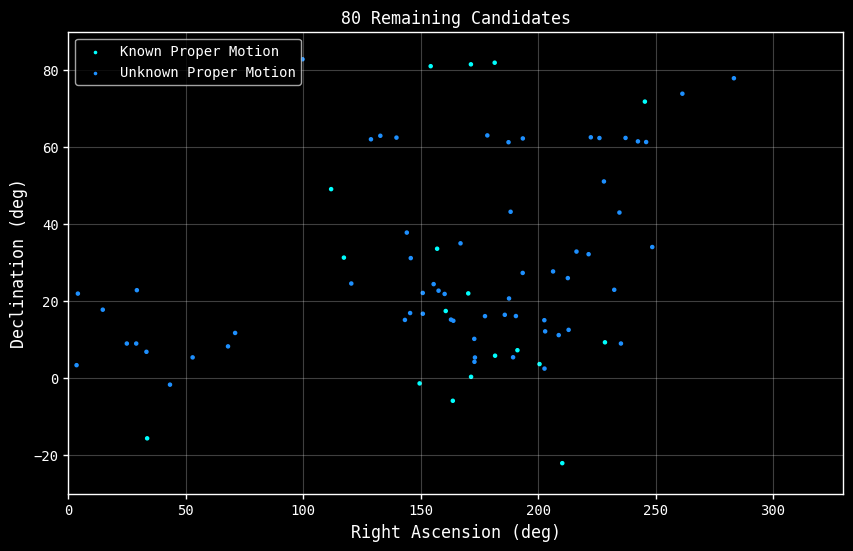

In [167]:
plt.figure(figsize=(10, 6))

plt.scatter(new_RA, new_DEC, s=pmq*(1-tma)*5,c='cyan', label="Known Proper Motion")
plt.scatter(ra_USNO, dec_USNO, s=(1-pmq)*(1-tma)*5,c='dodgerblue', label="Unknown Proper Motion")

plt.title(str(len(id_USNO)-tma.sum())+" Remaining Candidates")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.xlim(0,330)
plt.ylim(-30,90)
plt.grid(alpha=0.25)
plt.legend()

plt.savefig('C80.png')

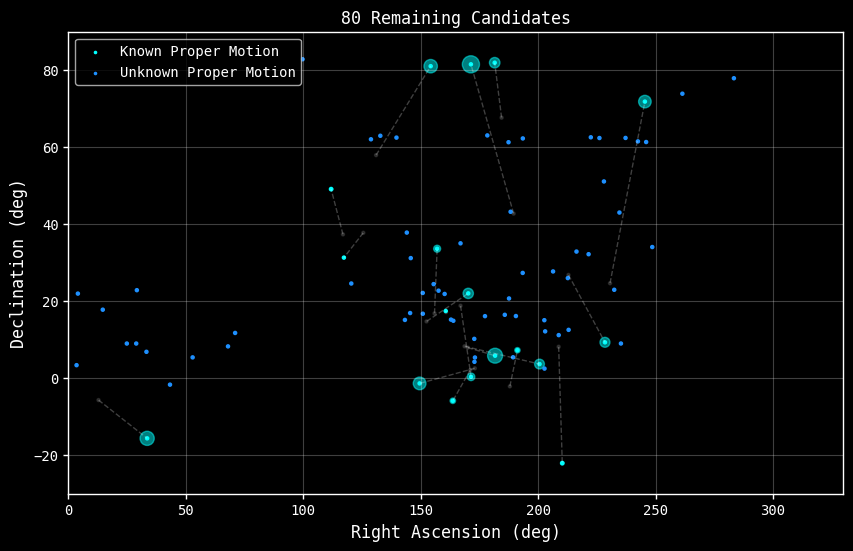

In [168]:
plt.figure(figsize=(10, 6))

plt.scatter(ra_USNO, dec_USNO, s=pmq*(1-tma)*5,c='gray',alpha=0.25)
plt.scatter(new_RA, new_DEC, s=pmq*(1-tma)*5,c='cyan', label="Known Proper Motion")
plt.scatter(new_RA, new_DEC, s=(e_new_RA**2+e_new_DEC**2)*(1-tma),c='cyan',alpha=0.5)
plt.scatter(ra_USNO, dec_USNO, s=(1-pmq)*(1-tma)*5,c='dodgerblue', label="Unknown Proper Motion")

for i in range(len(pmq)):
    plt.plot([ra_USNO[i], new_RA[i]], [dec_USNO[i], new_DEC[i]], color='white', alpha=pmq[i]*(1-tma[i])*0.25, linestyle='--', linewidth=1)

plt.title(str(len(id_USNO)-tma.sum())+" Remaining Candidates")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.xlim(0,330)
plt.ylim(-30,90)
plt.grid(alpha=0.25)
plt.legend()

plt.savefig('PM80.png')

In [25]:
# compare with "interesting candidates" table in paper

dat = "t3.txt"
t3 = pd.read_csv(dat, sep="\s")
icRA = (t3['1'] + t3['2']/60 + t3['3']/3600)*15
icDEC = (t3['4']/np.abs(t3['4']))*(np.abs(t3['4']) + t3['5']/60 + t3['6']/3600)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/42/n19l23jj67q_f9yg7hq4ky500000gn/T/ipykernel_96723/4189413631.py:4: SyntaxWarning: invalid escape sequence '\s'
  t3 = pd.read_csv(dat, sep="\s")
/var/folders/42/n19l23jj67q_f9yg7hq4ky500000gn/T/ipykernel_96723/4189413631.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  t3 = pd.read_csv(dat, sep="\s")


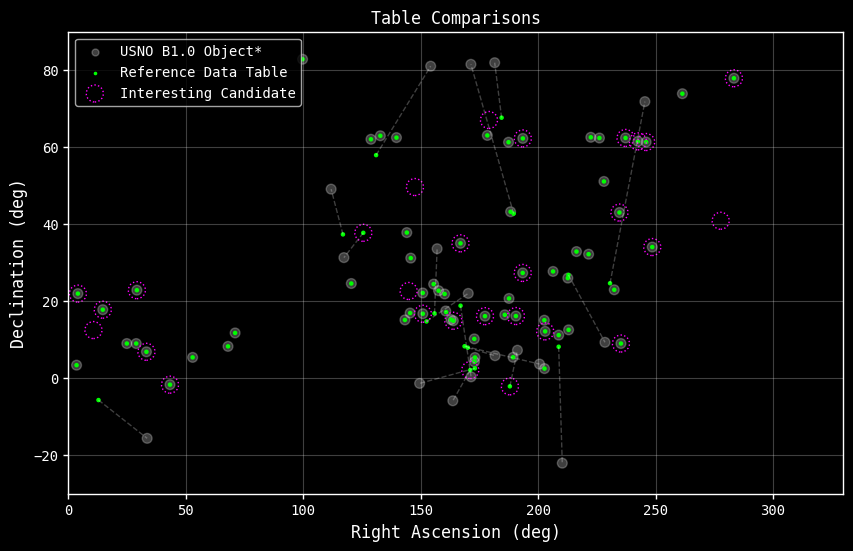

In [169]:
plt.figure(figsize=(10, 6))

plt.scatter(new_RA, new_DEC, s=(1-tma)*50,c='white',alpha=0.25, label="USNO B1.0 Object*")
plt.scatter(ra_table, dec_table, s=(1-tma)*5,c='lime',label="Reference Data Table")

for i in range(len(pmq)):
    plt.plot([ra_USNO[i], new_RA[i]], [dec_USNO[i], new_DEC[i]], color='white', alpha=pmq[i]*(1-tma[i])*0.25, linestyle='--', linewidth=1)

plt.scatter(icRA, icDEC, s=150,marker='o',facecolors='none',edgecolors='magenta',linestyle=':', label="Interesting Candidate")

plt.title("Table Comparisons")
plt.xlabel("Right Ascension (deg)")
plt.ylabel("Declination (deg)")
plt.xlim(0,330)
plt.ylim(-30,90)
plt.grid(alpha=0.25)
plt.legend()

plt.savefig('80cand.png')

In [ ]:
# PBH Calculations

# order-of-magnitude with parameter estimates/averages (talked to Esser) and uniform distribution over time (confirmed correct)

def PBH(m):
    f = 1
    r = 0.3
    s = 200
    n = (r/100)*(7/(np.sqrt(2)*s))**3  
    a = 3.76
    b = 0.685
    c = -0.883
    v = a*(m**b) + c  #m = M/M0
    SP = np.exp(-f*n*v)
    DP = 1-SP #destruction probability
    size = 1045175762*0.6 #paper says they looked at ~60% of USNO catalog
    t = 70 
    T = 10**10 #~10B 
    dt = t/T
    N =  DP*size
    return N, N*dt

print("N (All time): ~", PBH(.5)[0])
print("N (70 years): ~", PBH(0.5)[1])

#print("N (All time):", PBH(0.2)[0],"-",PBH(0.8)[0])
#print("N (70 years):", PBH(0.2)[1],"-",PBH(0.8)[1])


N (All time): ~ 41.515028920322024
N (70 years): ~ 2.9060520244225416e-07


In [ ]:
# Graphing N as a function of m (with constant t) with adjustable parameters for r,s ?

In [171]:
# N as a function of several variables?
# Systematically plot each parameter to try to get N closer to the observed disappearances

# f:0-1, m:0.1-8, r:0.1-0.9, s:90-200
# around 1% of stars have M > 4*M0, @ mass > 8-1M they become supergiants
# r is 0.2-0.7 in milky way, could reach as high as 800 in center, much lower for universal average
# s is 200 for nomal eliptical galaxies, could go to ~90 for spiral galaxies, up to 1000+ in some galaxies

def PBH(f,m,r,s):
    #f = 1
    #r = 0.3
    #s = 200
    #m = 0.5
    n = (r/100)*(7/(np.sqrt(2)*s))**3  
    a = 3.76
    b = 0.685
    c = -0.883
    v = a*(m**b) + c  #m = M/M0
    SP = np.exp(-f*n*v)
    DP = 1-SP
    size = 1045175762*0.6 #paper says they looked at ~60% of USNO catalog
    t = 70 
    T = 10**10 #~10B 
    dt = t/T
    D =  DP*size
    return D*dt

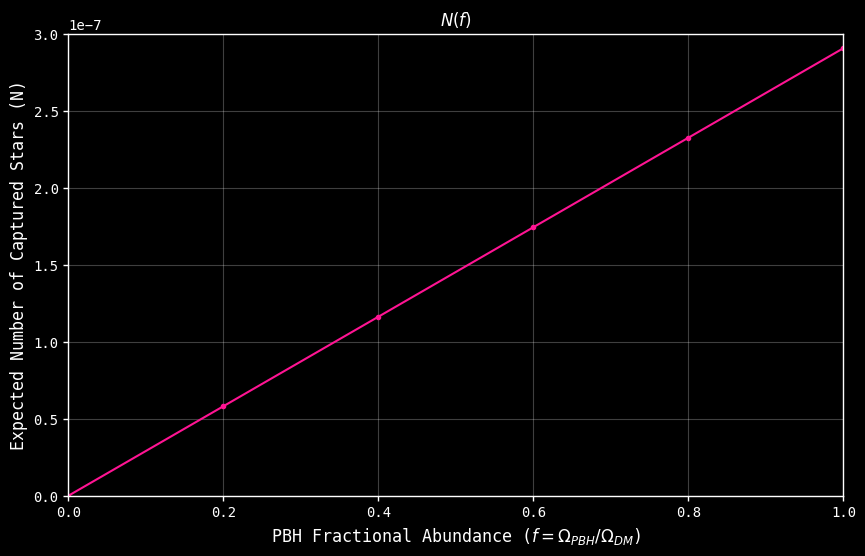

In [179]:
m = 0.5
r = 0.3
s = 200

f = np.linspace(0, 1, 6)

plt.figure(figsize=(10, 6))
plt.plot(f, PBH(f,m,r,s),".-",color="deeppink")
plt.title(r"$N(f)$")
plt.xlabel(r"PBH Fractional Abundance ($f = Ω_{PBH}/Ω_{DM}$)")
plt.ylabel("Expected Number of Captured Stars (N)")
plt.xlim(0,1)
plt.ylim(0,3*10**-7)
plt.grid(alpha=0.25)
#plt.show()

plt.savefig('Nf.png')

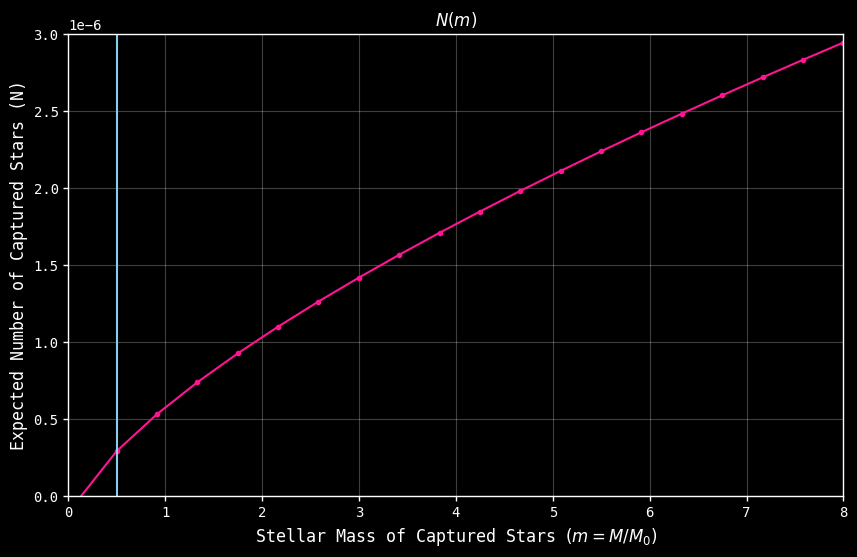

In [180]:
f = 1
r = 0.3
s = 200

m = np.linspace(0.08, 8, 20)

plt.plot(m, PBH(f,m,r,s),".-",color="deeppink")
plt.vlines(x=0.5, ymin=0, ymax=0.000003, colors='skyblue', linestyles='-')
plt.title(r"$N(m)$")
plt.xlabel(r"Stellar Mass of Captured Stars $(m = M/M_0)$")
plt.ylabel("Expected Number of Captured Stars (N)")
plt.xlim(0,8)
plt.ylim(0,0.000003)
plt.grid(alpha=0.25)
#plt.show()

plt.savefig('Nm.png')

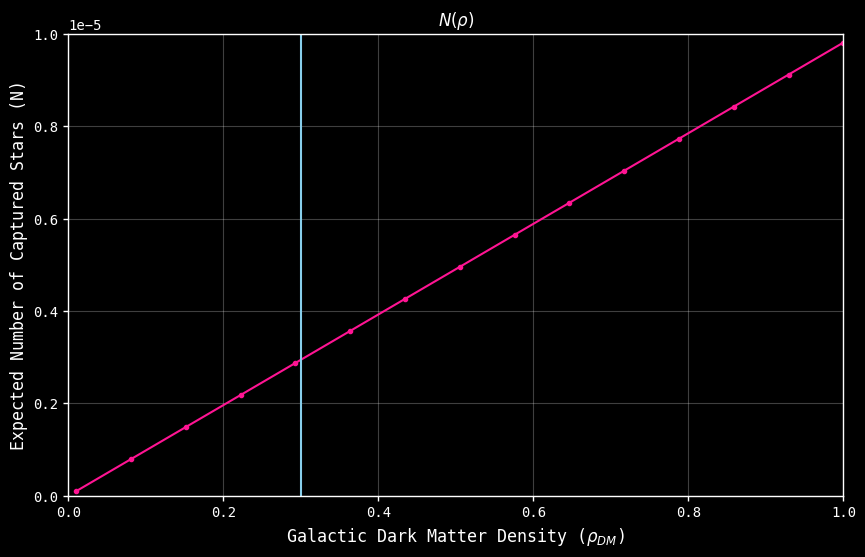

In [181]:
f = 1
m = 8
s = 200

r = np.linspace(0.01, 1, 15)

plt.plot(r, PBH(f,m,r,s),".-",color="deeppink")
plt.title(r"$N(ρ)$")
plt.vlines(x=0.3, ymin=0, ymax=0.00001, colors='skyblue', linestyles='-')
plt.xlabel(r"Galactic Dark Matter Density ($ρ_{DM}$)")
plt.ylabel("Expected Number of Captured Stars (N)")
plt.xlim(0,1)
plt.ylim(0,0.00001)
plt.grid(alpha=0.25)

plt.savefig('Np.png')

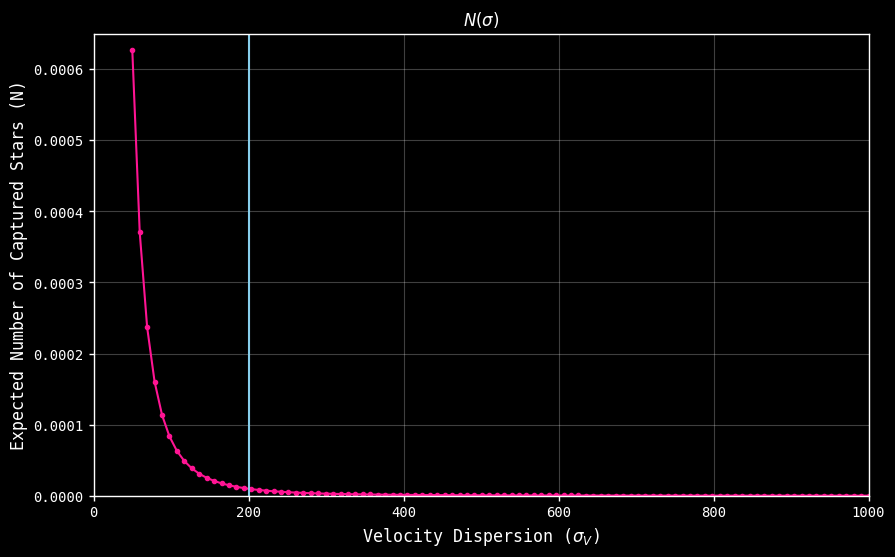

In [182]:
f = 1
m = 8
r = 1

s = np.linspace(50, 1000, 100)

plt.plot(s, PBH(f,m,r,s),".-",color="deeppink")
plt.vlines(x=200, ymin=0, ymax=0.0007, colors='skyblue', linestyles='-')
plt.title(r"$N(σ)$")
plt.xlabel(r"Velocity Dispersion ($σ_{V}$)")
plt.ylabel("Expected Number of Captured Stars (N)")
plt.xlim(0,1000)
plt.ylim(0.0,0.00065)
plt.grid(alpha=0.25)

plt.savefig('Ns.png')

In [160]:
def PBH():
    m = 8
    f = 1
    r = 1
    s = 50
    n = (r/100)*(7/(np.sqrt(2)*s))**3  
    a = 3.76
    b = 0.685
    c = -0.883
    v = a*(m**b) + c  #m = M/M0
    SP = np.exp(-f*n*v)
    DP = 1-SP #destruction probability
    size = 1045175762*0.6 #paper says they looked at ~60% of USNO catalog
    t = 70 
    T = 10**10 #~10B 
    dt = t/T
    N =  DP*size
    return N*dt

print("N Upper Limit with Best-Case Parameters:", PBH())

N Upper Limit with Best-Case Parameters: 0.0006277498461577174
